In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../data/raw/BBC news dataset.csv')
df.head()

,Unnamed: 0,description,tags
0,0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,..."
1,1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ..."
2,2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,..."
3,3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'..."
4,4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta..."


In [2]:
df.shape

(2410, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2410 non-null   int64 
 1   description  2410 non-null   object
 2   tags         2392 non-null   object
dtypes: int64(1), object(2)
memory usage: 56.6+ KB


In [4]:
df.isnull().sum()

Unnamed: 0      0
description     0
tags           18
dtype: int64

In [5]:
df=df.drop(columns=['Unnamed: 0'])

In [6]:
df['category']=df['tags'].fillna("").apply(lambda x: x.split(',')[0].strip().lower() if x else None)
df.tail(20)

,description,tags,category
2390,trade gap narrows as exports rise the uks tra...,"business, office for national statistics, capi...",business
2391,verizon seals takeover of mci verizon has won...,"business, qwest, verizon, sbc communications, ...",business
2392,call to overhaul uk state pension the uk pens...,"labor, social issues, national insurance, unit...",labor
2393,europe blames us over weak dollar european le...,"business, tokyo, brussels, jpmorgan chase bank...",business
2394,walmart to pay m in gun suit the worlds large...,"law, business, war, wal-mart's, wal-mart, supe...",law
2395,building giant in asbestos payout australian ...,"business, james hardie, hardie, australia, uni...",business
2396,why few targets are better than many the econ...,"business, lisbon, brussels, asia, europe, chin...",business
2397,japan bank shares up on link talk shares of s...,"business, smfg, daiwa securities, nikkocitigro...",business
2398,nasdaq planning mshare sale the owner of the ...,"business, nasdaq stock market, intel, amazon, ...",business
2399,court rejects bn tobacco case a us government...,"law, washington, rj reynolds tobacco, altria g...",law


In [7]:
df = df[df["category"].notna()]


In [8]:
valid_categories=['business', 'entertainment', 'politics', 'sports', 'technology']
df=df[df['category'].isin(valid_categories)]

In [9]:
df.category.value_counts()

category
sports           473
entertainment    413
business         399
technology       391
politics         294
Name: count, dtype: int64

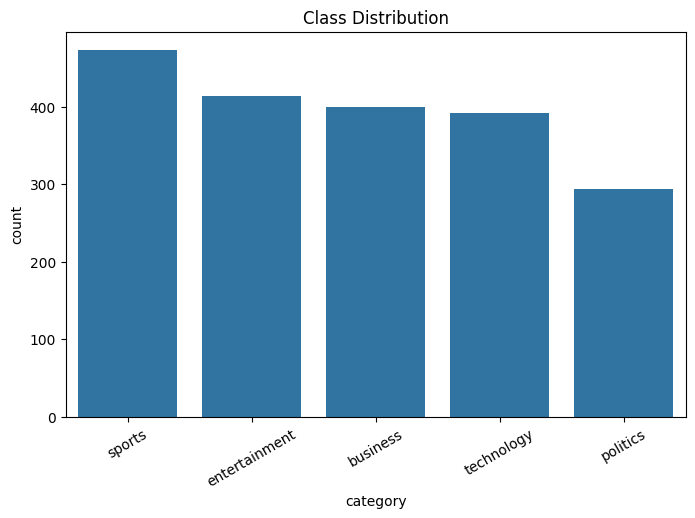

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Class Distribution')
plt.xticks(rotation=30)
plt.show()

In [11]:
#word count per article
df['text_length']=df['description'].apply(lambda x: len(x.split()))
df.head()

,description,tags,category,text_length
0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,...",sports,440
1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ...",sports,685
2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,...",sports,225
3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'...",sports,440
4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta...",sports,175


In [12]:
df.text_length.describe()

count    1970.000000
mean      382.412690
std       217.098208
min        11.000000
25%       241.000000
50%       332.000000
75%       473.750000
max      2865.000000
Name: text_length, dtype: float64

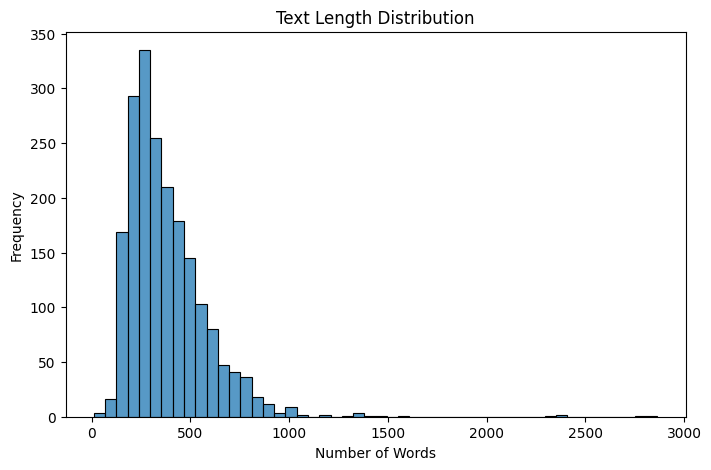

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [14]:
#Remoce extremely short articles
df=df[df.text_length>=20]

In [15]:
df.category.value_counts()

category
sports           470
entertainment    413
business         399
technology       391
politics         294
Name: count, dtype: int64

In [16]:
df.shape

(1967, 4)

In [17]:
df.to_csv("../data/processed/bbc_news_clean.csv", index=False)